In [1]:

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv("googleplaystore.csv")
df['index'] = df.index

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


## Выберите любые два жанра, посчитайте, есть ли для них разница по количеству платных и бесплатных приложений.

In [4]:
df.Genres.value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [5]:

# формирую группы по двум жанрам
df_bis=df[df['Genres']=='Business']
df_med=df[df['Genres']=='Medical']

In [6]:
df_bis.Type.value_counts()

Free    446
Paid     14
Name: Type, dtype: int64

In [7]:
df_med.Type.value_counts()

Free    354
Paid    109
Name: Type, dtype: int64

In [8]:
app_cut = df[(df.Genres == "Business") | (df.Genres == "Medical")]

In [9]:
# Нулевая гипотеза: доли платных приложений в двух жанрах не различаются
# Проверяем с помощью Хи квадрат теста
t=pd.crosstab(app_cut.Genres, app_cut.Type)
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Business to Medical
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Free    2 non-null      int64
 1   Paid    2 non-null      int64
dtypes: int64(2)
memory usage: 48.0+ bytes


In [10]:
t.sum()["Paid"]/t.sum().sum()

0.13326110509209102

In [11]:
stats.chi2_contingency(t) 

(82.17976572988027,
 1.2425543815508097e-19,
 1,
 array([[398.69989166,  61.30010834],
        [401.30010834,  61.69989166]]))

In [12]:
chi2, p, dof, expected = stats.chi2_contingency(t) 
p

1.2425543815508097e-19

Вывод: p-value < 0.05 => отвергаем нулевую гипотезу,  доли платных приложений в двух жанрах статистически различаются

## Выберите любые две категории, посчитайте, есть ли для них разница по количеству платных и бесплатных приложений.

In [13]:
# формирую группы по двум категориям
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
app_cut2 = df[(df.Category == "PARENTING") | (df.Category == "COMICS")]


In [15]:
t2=pd.crosstab(app_cut2.Category, app_cut2.Type)
t2
# наблюдений не везде больше 5, проводим тест Фишера

Type,Free,Paid
Category,,
COMICS,60,0
PARENTING,58,2


In [16]:
from scipy.stats import fisher_exact

In [17]:
oddsr, p = fisher_exact(t2, alternative='two-sided') 
p< 0.05

False

Вывод: p-value > 0.05 => принимаем нулевую гипотезу,  доли платных приложений в двух категориях статистически не различаются

## Оставьте только платные приложения. Проверьте, есть ли разница в цене между приложениями категорий (Category) GAME и TOOLS.

нулевая гипотеза: средняя цена категории Игры равна средней цене категории Инструменты

In [18]:
paid = df[(df.Type=="Paid")]
paid['Price'] = paid['Price'].str[1:]



/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/2092432551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['Price'] = paid['Price'].str[1:]


In [19]:
paid['Price'] = paid['Price'].astype(float)

/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/2488510142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['Price'] = paid['Price'].astype(float)


In [20]:


# Формируем датафреймы
games = paid[paid.Category == "GAME"] 
tools = paid[paid. Category == "TOOLS"]

<Axes: ylabel='Price'>

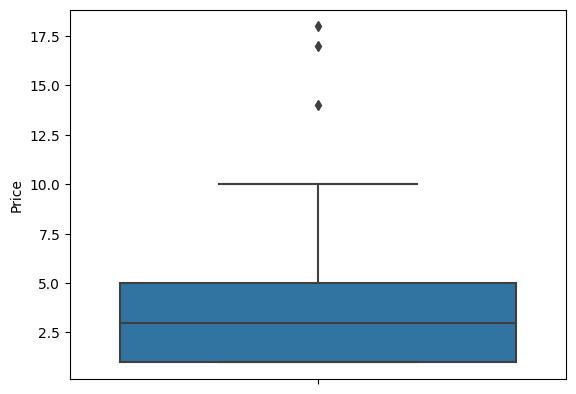

In [21]:
# проверяем на нормальность
sns.boxplot(y=games.Price)

<Axes: ylabel='Price'>

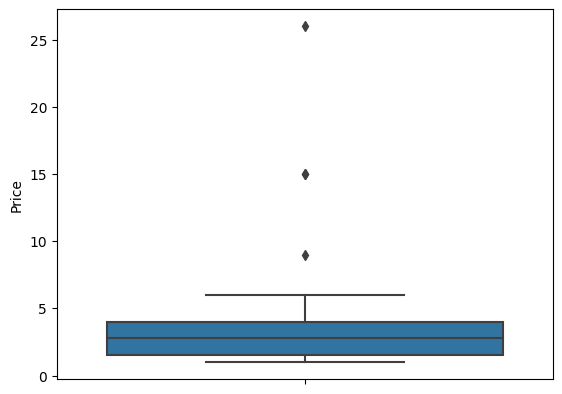

In [22]:
sns.boxplot(y=tools.Price)

визуально распределения выглядят ненормальными, поэтому используем непараметрический тест Манна-Уитни

In [23]:
stats.mannwhitneyu(games.Price,tools.Price)

MannwhitneyuResult(statistic=3230.0, pvalue=0.982226665512117)

## Вывод: средние цены двух категорий значимо не различаются

## Отличается ли количество отзывов у платных и бесплатных приложений в категории GAME.

In [24]:

games = df[(df.Category == "GAME")]
#Формируем датафреймы  
free = games[(games.Type == "Free")]
paid = games[(games.Type == "Paid")]

free['Reviews'] = free['Reviews'].astype(float)
paid['Reviews'] = paid['Reviews'].astype(float)

/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/764349274.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free['Reviews'] = free['Reviews'].astype(float)
/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/764349274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid['Reviews'] = paid['Reviews'].astype(float)


In [25]:
free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 1653 to 10804
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1061 non-null   object 
 1   Category        1061 non-null   object 
 2   Rating          1020 non-null   float64
 3   Reviews         1061 non-null   float64
 4   Size            1061 non-null   object 
 5   Installs        1061 non-null   object 
 6   Type            1061 non-null   object 
 7   Price           1061 non-null   object 
 8   Content Rating  1061 non-null   object 
 9   Genres          1061 non-null   object 
 10  Last Updated    1061 non-null   object 
 11  Current Ver     1061 non-null   object 
 12  Android Ver     1061 non-null   object 
 13  index           1061 non-null   int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 124.3+ KB


<Axes: ylabel='Reviews'>

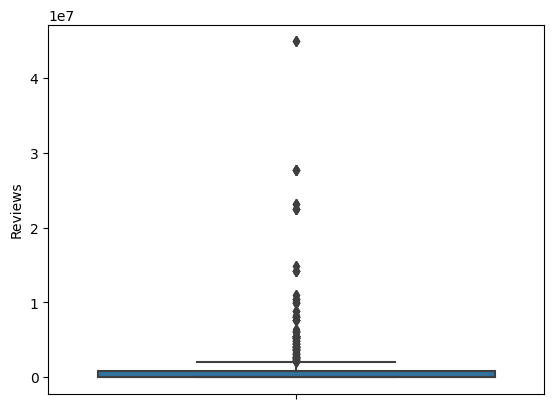

In [26]:
# проверяем на нормальность
sns.boxplot(y=free.Reviews)

<Axes: ylabel='Reviews'>

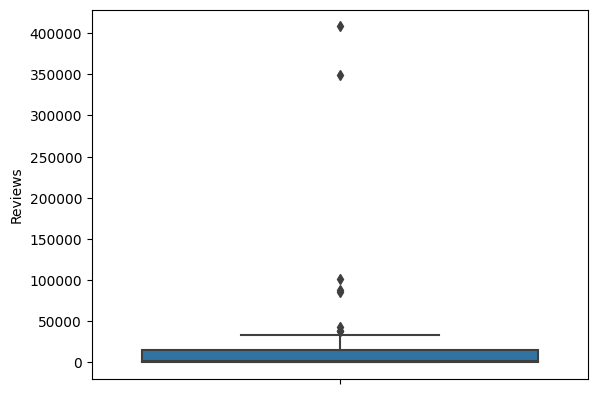

In [27]:
sns.boxplot(y=paid.Reviews)

визуально распределения выглядят ненормальными, поэтому используем непараметрический тест Манна-Уитни

In [28]:
stats.mannwhitneyu(free.Reviews,paid.Reviews)

MannwhitneyuResult(statistic=69145.0, pvalue=4.577364820062336e-18)

## Вывод: среднее количество отзывов у платных и бесплатных приложений в категории GAME значимо различаются

## Правда ли, что в категории MEDICAL есть взаимосвязь между тем фактом, что приложение платное, и фактом, что у приложения отзывов больше, чем в среднем в этой категории.

In [29]:

med = df[(df.Category == "MEDICAL")]
med['Reviews'] = med['Reviews'].astype(float)
# Формируем датафрейм
med_paid = med[(med.Type == "Paid")]


/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/1439756726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med['Reviews'] = med['Reviews'].astype(float)


In [30]:
med_paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 2243 to 9719
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             109 non-null    object 
 1   Category        109 non-null    object 
 2   Rating          88 non-null     float64
 3   Reviews         109 non-null    float64
 4   Size            109 non-null    object 
 5   Installs        109 non-null    object 
 6   Type            109 non-null    object 
 7   Price           109 non-null    object 
 8   Content Rating  109 non-null    object 
 9   Genres          109 non-null    object 
 10  Last Updated    109 non-null    object 
 11  Current Ver     109 non-null    object 
 12  Android Ver     109 non-null    object 
 13  index           109 non-null    int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 12.8+ KB


In [31]:
# вычисляем среднее кол-во отзывов у категории
m = med['Reviews'].mean()
m

3425.4319654427645

In [32]:
med['Reviews'].count()

463

In [33]:
# вычисляем среднее кол-во отзывов у платных приложений
m1 = med_paid['Reviews'].mean()
m1

300.1284403669725

In [34]:
med_paid['Reviews'].count()

109

<Axes: ylabel='Reviews'>

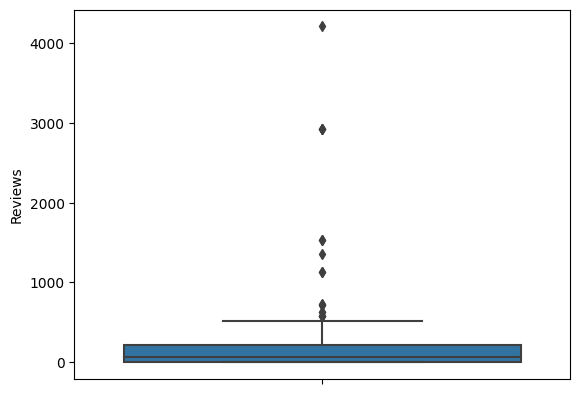

In [35]:
# смотрим на распределения
sns.boxplot(y=med_paid.Reviews)

<Axes: ylabel='Reviews'>

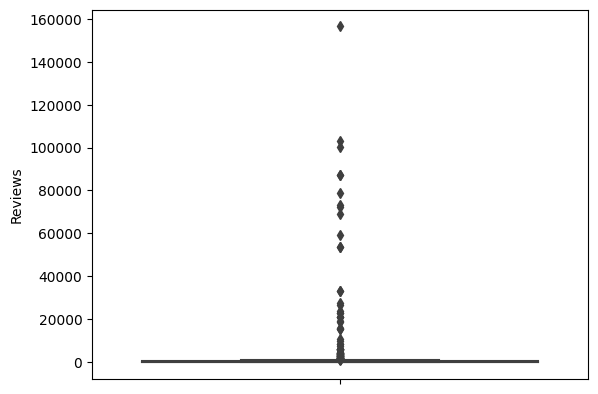

In [36]:
sns.boxplot(y=med.Reviews)

In [37]:
# распределения ненормальны - используем непараметрический тест Манна-Уитни
stats.mannwhitneyu(med.Reviews, med_paid.Reviews, alternative='less')

MannwhitneyuResult(statistic=24249.0, pvalue=0.2628341785397463)

In [38]:
# в задании говорится про средние значения, а тест М-У вычисляется по рангам, поэтому проведу T-test

In [39]:

# Выполнение t-теста
t_statistic, p_value = stats.ttest_1samp(med_paid.Reviews, popmean=m)

if p_value < 0.05:
    conclusion = "Отвергаем нулевую гипотезу"
else:
    conclusion = "Не отвергаем нулевую гипотезу"

conclusion

'Отвергаем нулевую гипотезу'

## Вывод: несмотря на ненормальность распределения, я провела односторонний T-test. Количество отзывов у платных приложений в категории значимо отличается от среднего в этой категории

## На какие еще вопросы вы можете ответить с помощью этих данных? Придумайте и протестируйте, как минимум, один

In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4


In [41]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [42]:
# вопрос: отличается ли рейтинг приложений у категорий контента для подростков (Teen) и взрослых (Mature 17+)
# создадим датафреймы: 
teens = df[(df['Content Rating'] == "Teen")]
matures = df[(df['Content Rating'] == "Mature 17+")]



In [43]:
teens['Rating'] = teens['Rating'].astype(float)
matures['Rating'] = matures['Rating'].astype(float)


/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/2385376544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teens['Rating'] = teens['Rating'].astype(float)
/var/folders/vy/dqjs80ms1kg43qy8g1wp0x1m0000gn/T/ipykernel_55538/2385376544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matures['Rating'] = matures['Rating'].astype(float)


In [44]:
teens = teens.dropna()
matures = matures.dropna()

<Axes: ylabel='Rating'>

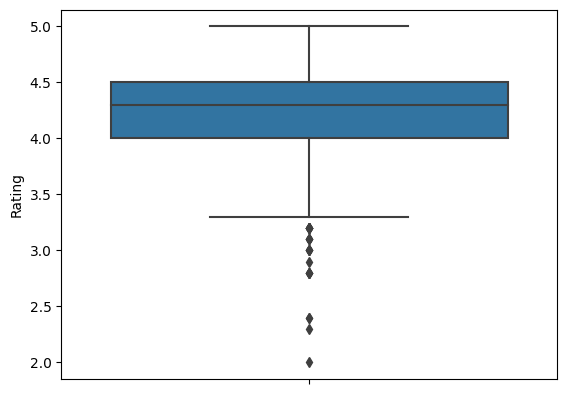

In [45]:
sns.boxplot(y=teens.Rating)

<Axes: ylabel='Rating'>

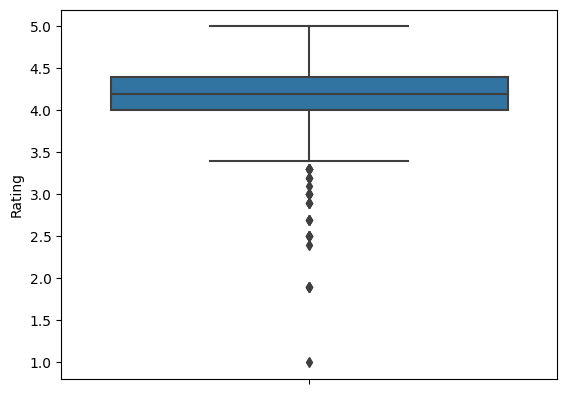

In [46]:
sns.boxplot(y=matures.Rating)

In [47]:
teens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 3 to 10820
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1084 non-null   object 
 1   Category        1084 non-null   object 
 2   Rating          1084 non-null   float64
 3   Reviews         1084 non-null   object 
 4   Size            1084 non-null   object 
 5   Installs        1084 non-null   object 
 6   Type            1084 non-null   object 
 7   Price           1084 non-null   object 
 8   Content Rating  1084 non-null   object 
 9   Genres          1084 non-null   object 
 10  Last Updated    1084 non-null   object 
 11  Current Ver     1084 non-null   object 
 12  Android Ver     1084 non-null   object 
 13  index           1084 non-null   int64  
dtypes: float64(1), int64(1), object(12)
memory usage: 127.0+ KB


In [48]:
# непонятно по графику, нормальны ли распределения, проведем тест Шапиро-Уилка
statistic, p_value = stats.shapiro(teens.Rating)
statistic, p_value

(0.9337953329086304, 1.624694198566385e-21)

In [49]:
statistic, p_value = stats.shapiro(matures.Rating)
statistic, p_value

(0.8778104782104492, 1.3297999545683176e-18)

In [50]:
# распределения ненормальны, считаем разницу критерием Манна-Уитни
stats.mannwhitneyu(teens.Rating, matures.Rating, alternative='two-sided')

MannwhitneyuResult(statistic=280850.0, pvalue=0.00010546363019644629)

## Вывод:  рейтинг приложений у категорий контента для подростков (Teen) и взрослых (Mature 17+) значимо различается, так как pvalue<0.05